<a href="https://colab.research.google.com/github/Faraaztqureshi/DS-Unit-1-Build/blob/master/Faraaz_Qureshi_Build_Week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing

In [0]:
## This is my notebook for analyzing and making visuals 
## I am looking at SAT data from LAUSD from 2015-2016
## lets get the libraries first
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline 

In [0]:
## now lets import the data set
## keep an original in case I mess something up later
df = pd.read_csv('sat_report3.csv')
original_df = pd.read_csv('sat_report3.csv')

In [3]:
print(df.shape)
print(original_df.shape)

(2334, 13)
(2334, 13)


In [4]:
## inspect the data
df.head()

,cds,rtype,sname,dname,cname,enroll12,NumTstTakr,AvgScrRead,AvgScrMath,AvgScrWrit,NumGE1500,PctGE1500,year
0,0,X,NaN,NaN,NaN,492835,214262,484,494,477,89840,41.93,1516
1,1000000000000,C,NaN,NaN,Alameda,16662,8611,517,534,515,4696,54.53,1516
2,1100170000000,D,NaN,Alameda County Office of Education,Alameda,263,95,395,378,388,6,6.32,1516
3,1100170112607,S,Envision Academy for Arts & Technology,Alameda County Office of Education,Alameda,88,92,391,376,386,5,5.43,1516
4,1611190000000,D,NaN,Alameda Unified,Alameda,858,472,527,543,514,301,63.77,1516


In [5]:
## I do not need the top row of data as it is statewide
## first I want to grab this specific row
df.iloc[0]

cds                0
rtype              X
sname            NaN
dname            NaN
cname            NaN
enroll12      492835
NumTstTakr    214262
AvgScrRead       484
AvgScrMath       494
AvgScrWrit       477
NumGE1500      89840
PctGE1500      41.93
year            1516
Name: 0, dtype: object

In [0]:
## now to drop it and save over the df
df = df.drop(0)

In [7]:
## check to see if it worked
df.head()

,cds,rtype,sname,dname,cname,enroll12,NumTstTakr,AvgScrRead,AvgScrMath,AvgScrWrit,NumGE1500,PctGE1500,year
1,1000000000000,C,NaN,NaN,Alameda,16662,8611,517,534,515,4696,54.53,1516
2,1100170000000,D,NaN,Alameda County Office of Education,Alameda,263,95,395,378,388,6,6.32,1516
3,1100170112607,S,Envision Academy for Arts & Technology,Alameda County Office of Education,Alameda,88,92,391,376,386,5,5.43,1516
4,1611190000000,D,NaN,Alameda Unified,Alameda,858,472,527,543,514,301,63.77,1516
5,1611190106401,S,Alameda Science and Technology Institute,Alameda Unified,Alameda,37,35,572,612,530,30,85.71,1516


In [0]:
## I do not need the cds column or the rtype column
df = df.drop(['cds', 'year'], axis=1)

In [9]:
## check to see if it worked
df.head()

,rtype,sname,dname,cname,enroll12,NumTstTakr,AvgScrRead,AvgScrMath,AvgScrWrit,NumGE1500,PctGE1500
1,C,NaN,NaN,Alameda,16662,8611,517,534,515,4696,54.53
2,D,NaN,Alameda County Office of Education,Alameda,263,95,395,378,388,6,6.32
3,S,Envision Academy for Arts & Technology,Alameda County Office of Education,Alameda,88,92,391,376,386,5,5.43
4,D,NaN,Alameda Unified,Alameda,858,472,527,543,514,301,63.77
5,S,Alameda Science and Technology Institute,Alameda Unified,Alameda,37,35,572,612,530,30,85.71


In [10]:
## I want to organize the data by district
## I can seperate into schools, districts or counties
df['rtype'].value_counts()

S    1754
D     522
C      57
Name: rtype, dtype: int64

In [0]:
district_df = df[df['rtype'] == 'D']

In [12]:
district_df.head()

,rtype,sname,dname,cname,enroll12,NumTstTakr,AvgScrRead,AvgScrMath,AvgScrWrit,NumGE1500,PctGE1500
2,D,NaN,Alameda County Office of Education,Alameda,263,95,395,378,388,6,6.32
4,D,NaN,Alameda Unified,Alameda,858,472,527,543,514,301,63.77
11,D,NaN,Albany City Unified,Alameda,300,179,585,607,575,148,82.68
13,D,NaN,Berkeley Unified,Alameda,922,542,561,559,553,357,65.87
16,D,NaN,Castro Valley Unified,Alameda,789,411,535,558,531,264,64.23


In [13]:
## from this I do not need school name because they are all NaNs anyway
district_df.drop(['sname'], axis=1 , inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [14]:
## check to see if that worked
district_df.head()

,rtype,dname,cname,enroll12,NumTstTakr,AvgScrRead,AvgScrMath,AvgScrWrit,NumGE1500,PctGE1500
2,D,Alameda County Office of Education,Alameda,263,95,395,378,388,6,6.32
4,D,Alameda Unified,Alameda,858,472,527,543,514,301,63.77
11,D,Albany City Unified,Alameda,300,179,585,607,575,148,82.68
13,D,Berkeley Unified,Alameda,922,542,561,559,553,357,65.87
16,D,Castro Valley Unified,Alameda,789,411,535,558,531,264,64.23


In [0]:
## Now I'll drop the last two columns  as I'm more interested
## in the number of students who are enrolled vs who took the test
## I also want to reassign my district df into df1
df1 = district_df

In [16]:
## I need the exact column names
df1.columns

Index(['rtype', 'dname', 'cname', 'enroll12', 'NumTstTakr', 'AvgScrRead',
       'AvgScrMath', 'AvgScrWrit', 'NumGE1500', 'PctGE1500'],
      dtype='object')

In [17]:
## lets drop those last two columns
df1.drop(['NumGE1500', 'PctGE1500'], axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [18]:
df1.head()

,rtype,dname,cname,enroll12,NumTstTakr,AvgScrRead,AvgScrMath,AvgScrWrit
2,D,Alameda County Office of Education,Alameda,263,95,395,378,388
4,D,Alameda Unified,Alameda,858,472,527,543,514
11,D,Albany City Unified,Alameda,300,179,585,607,575
13,D,Berkeley Unified,Alameda,922,542,561,559,553
16,D,Castro Valley Unified,Alameda,789,411,535,558,531


In [19]:
## I also do not need the rtype column because I know it is by district
df1.drop(['rtype'], axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [20]:
df1.head()

,dname,cname,enroll12,NumTstTakr,AvgScrRead,AvgScrMath,AvgScrWrit
2,Alameda County Office of Education,Alameda,263,95,395,378,388
4,Alameda Unified,Alameda,858,472,527,543,514
11,Albany City Unified,Alameda,300,179,585,607,575
13,Berkeley Unified,Alameda,922,542,561,559,553
16,Castro Valley Unified,Alameda,789,411,535,558,531


In [21]:
## the first thing I want to explore is enrollment and num test
## takers so I'll do some checks for NaN values
df1['enroll12'].isnull().sum()

0

In [22]:
## do the same thing for test takers
df1['NumTstTakr'].isnull().sum()

0

In [0]:
## I like how my dataframe looks now, but I want to reset the index
df1.reset_index(inplace=True)

In [24]:
df1.head()

,index,dname,cname,enroll12,NumTstTakr,AvgScrRead,AvgScrMath,AvgScrWrit
0,2,Alameda County Office of Education,Alameda,263,95,395,378,388
1,4,Alameda Unified,Alameda,858,472,527,543,514
2,11,Albany City Unified,Alameda,300,179,585,607,575
3,13,Berkeley Unified,Alameda,922,542,561,559,553
4,16,Castro Valley Unified,Alameda,789,411,535,558,531


In [25]:
df1.drop(['index'], axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [26]:
df1.head()

,dname,cname,enroll12,NumTstTakr,AvgScrRead,AvgScrMath,AvgScrWrit
0,Alameda County Office of Education,Alameda,263,95,395,378,388
1,Alameda Unified,Alameda,858,472,527,543,514
2,Albany City Unified,Alameda,300,179,585,607,575
3,Berkeley Unified,Alameda,922,542,561,559,553
4,Castro Valley Unified,Alameda,789,411,535,558,531


# Feature Engineering 

In [27]:
## I want to add a column that has the percentage of students 
## who took the test
df1['percentage']= round(df1['NumTstTakr'] / df1['enroll12'], 2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
df1.head()

,dname,cname,enroll12,NumTstTakr,AvgScrRead,AvgScrMath,AvgScrWrit,percentage
0,Alameda County Office of Education,Alameda,263,95,395,378,388,0.36
1,Alameda Unified,Alameda,858,472,527,543,514,0.55
2,Albany City Unified,Alameda,300,179,585,607,575,0.60
3,Berkeley Unified,Alameda,922,542,561,559,553,0.59
4,Castro Valley Unified,Alameda,789,411,535,558,531,0.52


In [0]:
## I want to reorder the columns
df1 = df1[['dname', 'cname', 'enroll12', 'NumTstTakr', 'percentage', 'AvgScrRead', 'AvgScrMath',
       'AvgScrWrit']]

In [30]:
df1.head()

,dname,cname,enroll12,NumTstTakr,percentage,AvgScrRead,AvgScrMath,AvgScrWrit
0,Alameda County Office of Education,Alameda,263,95,0.36,395,378,388
1,Alameda Unified,Alameda,858,472,0.55,527,543,514
2,Albany City Unified,Alameda,300,179,0.60,585,607,575
3,Berkeley Unified,Alameda,922,542,0.59,561,559,553
4,Castro Valley Unified,Alameda,789,411,0.52,535,558,531


In [31]:
df1.shape

(522, 8)

In [32]:
## I have 35 instances of NaN values out of 522 datapoints
print(df1['AvgScrMath'].isnull().sum())
print(df1['AvgScrRead'].isnull().sum())
print(df1['AvgScrWrit'].isnull().sum())

35
35
35


In [0]:
## I'm going to drop the NaNs
df1 = pd.DataFrame.dropna(df1)

In [34]:
df1['AvgScrMath'].value_counts()
df1['AvgScrRead'].value_counts()
## I am going to need to get rid of these stars

*      65
532     9
495     8
485     7
507     6
       ..
621     1
588     1
450     1
396     1
325     1
Name: AvgScrRead, Length: 175, dtype: int64

In [0]:
df1 =  df1[df1['AvgScrMath'] != '*']

In [36]:
## I had to drop a lot of rows but the data is now clean
df1.shape

(422, 8)

In [37]:
df1.head()

,dname,cname,enroll12,NumTstTakr,percentage,AvgScrRead,AvgScrMath,AvgScrWrit
0,Alameda County Office of Education,Alameda,263,95,0.36,395,378,388
1,Alameda Unified,Alameda,858,472,0.55,527,543,514
2,Albany City Unified,Alameda,300,179,0.60,585,607,575
3,Berkeley Unified,Alameda,922,542,0.59,561,559,553
4,Castro Valley Unified,Alameda,789,411,0.52,535,558,531


In [0]:
## Pandas has been giving me messages about how I'm copying splice
## so I need to use a different way of grabbing specific columns
## I want to combine these into one total avg score
df1['AvgScrMath'] = df1['AvgScrMath'].astype(int)
df1['AvgScrRead'] = df1['AvgScrRead'].astype(int)
df1['AvgScrWrit'] = df1['AvgScrWrit'].astype(int)


In [0]:
## I also want to make a column that is combinedavg
## since most people look at overall score when they think
## about the SAT
##df1['combinedavg']= df1.apply(lambda row: (df1.AvgScrWrit + df1.AvgScrRead + df1.AvgScrMath), axis=1)
##df1['combinedavg'] =  df1[['AvgScrRead', 'AvgScrWrit', 'AvgScrMath']].sum(axis=1)

df1['combinedavg'] = df1['AvgScrMath'] + df1['AvgScrRead'] + df1['AvgScrWrit']


In [0]:
## reorganize my columns
df1 = df1[['dname', 'cname', 'enroll12', 'NumTstTakr', 'percentage', 'combinedavg' , 'AvgScrRead', 'AvgScrMath',
       'AvgScrWrit']]

In [41]:
df1.head()

,dname,cname,enroll12,NumTstTakr,percentage,combinedavg,AvgScrRead,AvgScrMath,AvgScrWrit
0,Alameda County Office of Education,Alameda,263,95,0.36,1161,395,378,388
1,Alameda Unified,Alameda,858,472,0.55,1584,527,543,514
2,Albany City Unified,Alameda,300,179,0.60,1767,585,607,575
3,Berkeley Unified,Alameda,922,542,0.59,1673,561,559,553
4,Castro Valley Unified,Alameda,789,411,0.52,1624,535,558,531


In [42]:
## a little more cleaning
df1.columns = ['district', 'county', 'testable_students', 'num_test_takers', 'percent_tested', 'combined_avg', 'avg_read_score', 'avg_math_score', 'avg_writ_score']
df1.head()


,district,county,testable_students,num_test_takers,percent_tested,combined_avg,avg_read_score,avg_math_score,avg_writ_score
0,Alameda County Office of Education,Alameda,263,95,0.36,1161,395,378,388
1,Alameda Unified,Alameda,858,472,0.55,1584,527,543,514
2,Albany City Unified,Alameda,300,179,0.60,1767,585,607,575
3,Berkeley Unified,Alameda,922,542,0.59,1673,561,559,553
4,Castro Valley Unified,Alameda,789,411,0.52,1624,535,558,531


In [0]:
## for the purpose of this assignment I'm going to drop the seperate scores
df1 = df1.drop(['avg_read_score', 'avg_math_score','avg_writ_score'], axis = 1)


In [44]:
df1.head()

,district,county,testable_students,num_test_takers,percent_tested,combined_avg
0,Alameda County Office of Education,Alameda,263,95,0.36,1161
1,Alameda Unified,Alameda,858,472,0.55,1584
2,Albany City Unified,Alameda,300,179,0.60,1767
3,Berkeley Unified,Alameda,922,542,0.59,1673
4,Castro Valley Unified,Alameda,789,411,0.52,1624


# Data Exploration

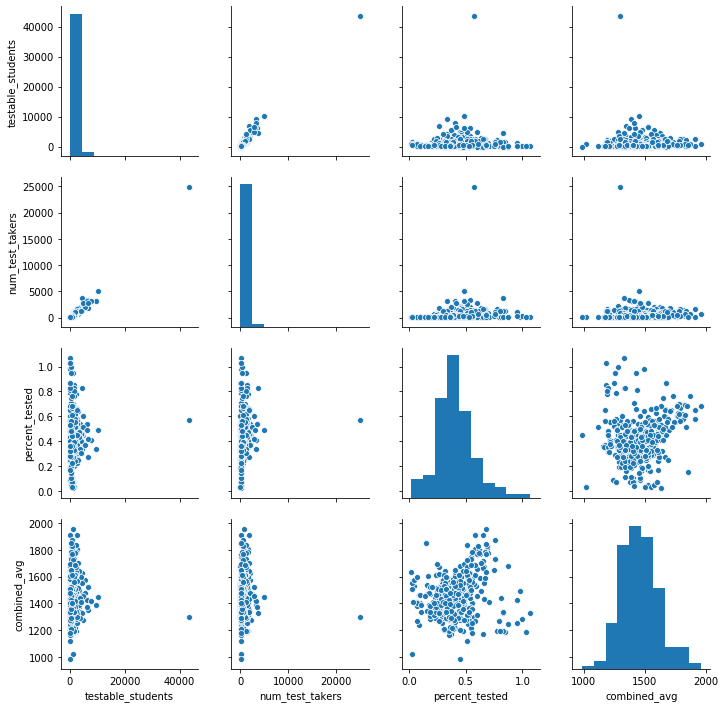

In [45]:
sns.pairplot(df1)

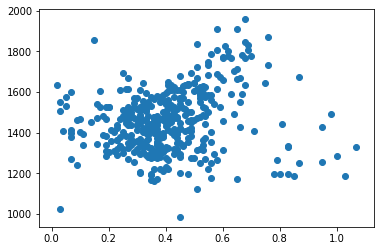

In [46]:
plt.scatter(df1['percent_tested'], df1['combined_avg'])

In [47]:
df1.columns

Index(['district', 'county', 'testable_students', 'num_test_takers',
       'percent_tested', 'combined_avg'],
      dtype='object')

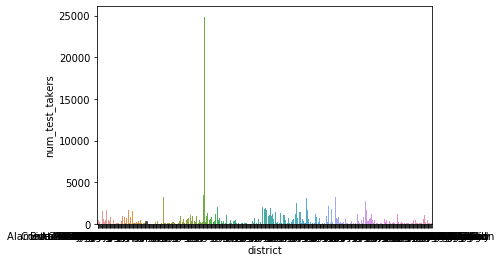

In [48]:
## lets look at percent tested
## play around with a bar plot
sns.barplot(x = df1['district'], y = df1['num_test_takers'])


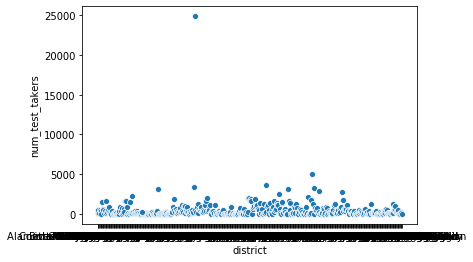

In [49]:
## lets see a scatterplot
sns.scatterplot(x = 'district', y= 'num_test_takers' , data = df1)

In [50]:
df1['county'][:]

0      Alameda
1      Alameda
2      Alameda
3      Alameda
4      Alameda
        ...   
515       Yolo
516       Yolo
517       Yolo
520       Yuba
521       Yuba
Name: county, Length: 422, dtype: object

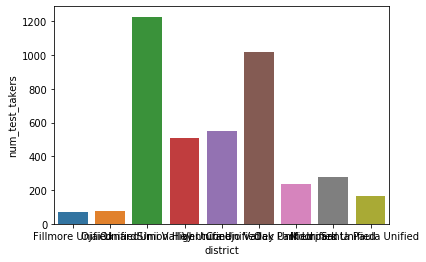

In [51]:
## I guess what I'm noticing is that I have too many districts to look at
## I live in Ventura County so I am going to subset 
sns.barplot(x ='district', y='num_test_takers', data = df1.query("county == 'Ventura'"))

In [0]:
ventura = df1[df1['county'] == 'Ventura']

In [53]:
ventura.columns

Index(['district', 'county', 'testable_students', 'num_test_takers',
       'percent_tested', 'combined_avg'],
      dtype='object')

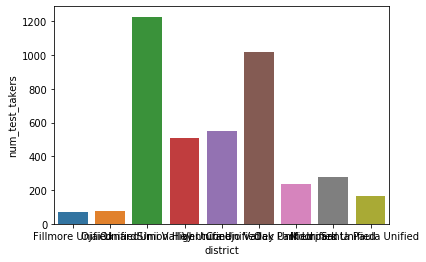

In [54]:
sns.barplot(x = 'district', y = 'num_test_takers', data = ventura)

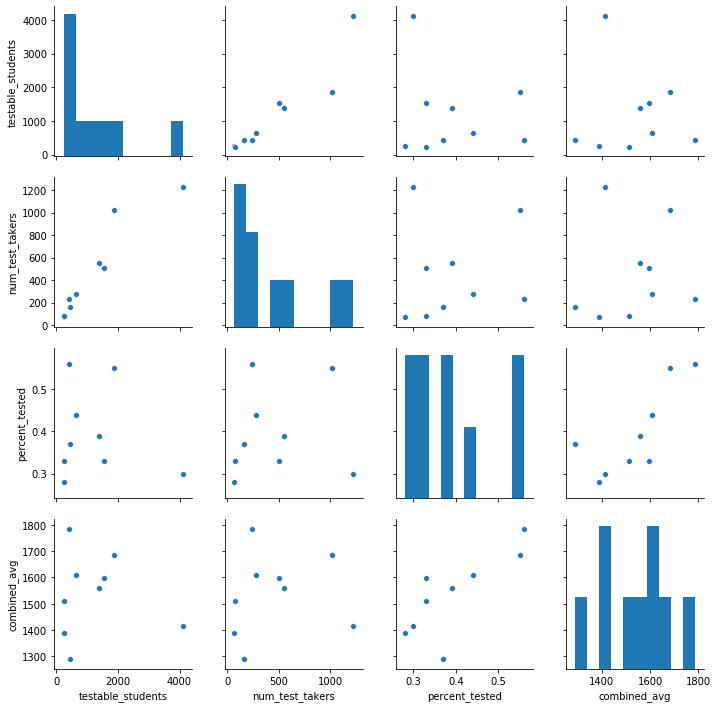

In [55]:
sns.pairplot(ventura)

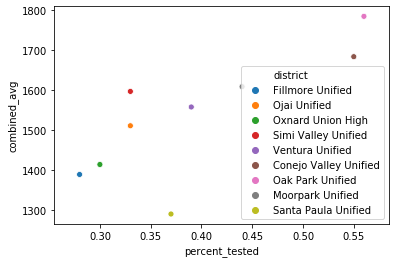

In [57]:
sns.scatterplot(x = 'percent_tested', y = 'combined_avg', hue = 'district', data = ventura)

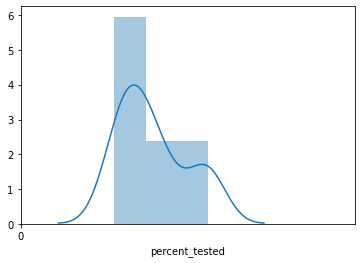

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

data = ventura['percent_tested']

fig, ax = plt.subplots()
sns.distplot(data, ax=ax)
ax.set_xlim(0,1)
ax.set_xticks(range(0,1))
plt.show()

In [59]:
test = ventura['district']
print(ventura['district'])

501         Fillmore Unified
504             Ojai Unified
505        Oxnard Union High
506      Simi Valley Unified
507          Ventura Unified
508    Conejo Valley Unified
509         Oak Park Unified
510         Moorpark Unified
511      Santa Paula Unified
Name: district, dtype: object


In [60]:
## I want to show test taking percentages for each school district in the county
## I also want to edit the df and remove

ventura['district'] = ventura['district'].astype(str)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [61]:
## eliminate the Unified
ventura['district'] = ventura['district'].str.replace('Unified', '')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [62]:
## eliminate the High
ventura['district'] = ventura['district'].str.replace('High', '')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [64]:
ventura.dtypes

district              object
county                object
testable_students      int64
num_test_takers        int64
percent_tested       float64
combined_avg           int64
dtype: object

In [65]:
ventura['num_test_takers'].sum()

4122

In [66]:
ventura['testable_students'].sum()

10871

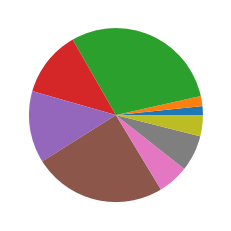

In [67]:
## lets go for a circle graph
## well donut graph
plt.pie(ventura['num_test_takers'])
plt.show()

In [68]:
## I need to have the total as a datapoint to have this make sense
ventura

,district,county,testable_students,num_test_takers,percent_tested,combined_avg
501,Fillmore,Ventura,241,68,0.28,1389
504,Ojai,Ventura,236,77,0.33,1511
505,Oxnard Union,Ventura,4108,1227,0.30,1414
506,Simi Valley,Ventura,1532,506,0.33,1597
507,Ventura,Ventura,1395,551,0.39,1558
508,Conejo Valley,Ventura,1869,1019,0.55,1684
509,Oak Park,Ventura,422,236,0.56,1785
510,Moorpark,Ventura,627,276,0.44,1609
511,Santa Paula,Ventura,441,162,0.37,1290


In [69]:
ventura.T

,501,504,505,506,507,508,509,510,511
district,Fillmore,Ojai,Oxnard Union,Simi Valley,Ventura,Conejo Valley,Oak Park,Moorpark,Santa Paula
county,Ventura,Ventura,Ventura,Ventura,Ventura,Ventura,Ventura,Ventura,Ventura
testable_students,241,236,4108,1532,1395,1869,422,627,441
num_test_takers,68,77,1227,506,551,1019,236,276,162
percent_tested,0.28,0.33,0.3,0.33,0.39,0.55,0.56,0.44,0.37
combined_avg,1389,1511,1414,1597,1558,1684,1785,1609,1290


In [0]:
ventura = ventura.T

In [71]:
ventura.loc['num_test_takers'].sum()

4122

In [72]:
ventura[512] = ventura.sum(axis=1)
ventura.head()

,501,504,505,506,507,508,509,510,511,512
district,Fillmore,Ojai,Oxnard Union,Simi Valley,Ventura,Conejo Valley,Oak Park,Moorpark,Santa Paula,Fillmore Ojai Oxnard Union Simi Valley Ventura...
county,Ventura,Ventura,Ventura,Ventura,Ventura,Ventura,Ventura,Ventura,Ventura,VenturaVenturaVenturaVenturaVenturaVenturaVent...
testable_students,241,236,4108,1532,1395,1869,422,627,441,10871
num_test_takers,68,77,1227,506,551,1019,236,276,162,4122
percent_tested,0.28,0.33,0.3,0.33,0.39,0.55,0.56,0.44,0.37,3.55


In [73]:
ventura

,501,504,505,506,507,508,509,510,511,512
district,Fillmore,Ojai,Oxnard Union,Simi Valley,Ventura,Conejo Valley,Oak Park,Moorpark,Santa Paula,Fillmore Ojai Oxnard Union Simi Valley Ventura...
county,Ventura,Ventura,Ventura,Ventura,Ventura,Ventura,Ventura,Ventura,Ventura,VenturaVenturaVenturaVenturaVenturaVenturaVent...
testable_students,241,236,4108,1532,1395,1869,422,627,441,10871
num_test_takers,68,77,1227,506,551,1019,236,276,162,4122
percent_tested,0.28,0.33,0.3,0.33,0.39,0.55,0.56,0.44,0.37,3.55
combined_avg,1389,1511,1414,1597,1558,1684,1785,1609,1290,13837


In [0]:
## rename the columms
ventura.columns = ['Fillmore', 'Ojai', 'Oxnard', 'Simi_Valley', 'Ventura', 'Conejo_Valley', 'Oak_Park', 'Moorpark','Santa_Paula', 'Totals']

In [75]:
ventura.head()

,Fillmore,Ojai,Oxnard,Simi_Valley,Ventura,Conejo_Valley,Oak_Park,Moorpark,Santa_Paula,Totals
district,Fillmore,Ojai,Oxnard Union,Simi Valley,Ventura,Conejo Valley,Oak Park,Moorpark,Santa Paula,Fillmore Ojai Oxnard Union Simi Valley Ventura...
county,Ventura,Ventura,Ventura,Ventura,Ventura,Ventura,Ventura,Ventura,Ventura,VenturaVenturaVenturaVenturaVenturaVenturaVent...
testable_students,241,236,4108,1532,1395,1869,422,627,441,10871
num_test_takers,68,77,1227,506,551,1019,236,276,162,4122
percent_tested,0.28,0.33,0.3,0.33,0.39,0.55,0.56,0.44,0.37,3.55


In [0]:
## I dont need district or county rows anymore
ventura = ventura.drop(['district', 'county'])

In [77]:
ventura

,Fillmore,Ojai,Oxnard,Simi_Valley,Ventura,Conejo_Valley,Oak_Park,Moorpark,Santa_Paula,Totals
testable_students,241,236,4108,1532,1395,1869,422,627,441,10871
num_test_takers,68,77,1227,506,551,1019,236,276,162,4122
percent_tested,0.28,0.33,0.3,0.33,0.39,0.55,0.56,0.44,0.37,3.55
combined_avg,1389,1511,1414,1597,1558,1684,1785,1609,1290,13837


In [0]:
ventura = ventura.T

In [0]:
colors = ['#8A2BE2','#4B0082','#483D8B','#6A5ACD','#7B68EE','#9370DB','#9400D3','#9932CC','#BA55D3','#778899']

In [0]:
colors1 = ['#00FF00','#32CD32','#90EE90','#98FB98','#00FA9A','#00FF7F','#2E8B57','#66CDAA','#3CB371','red']

In [94]:
ventura

,testable_students,num_test_takers,percent_tested,combined_avg
Fillmore,241,68,0.28,1389
Ojai,236,77,0.33,1511
Oxnard,4108,1227,0.3,1414
Simi_Valley,1532,506,0.33,1597
Ventura,1395,551,0.39,1558
Conejo_Valley,1869,1019,0.55,1684
Oak_Park,422,236,0.56,1785
Moorpark,627,276,0.44,1609
Santa_Paula,441,162,0.37,1290
Totals,10871,4122,3.55,13837


In [0]:
## I had the wrong total for the donut graph I had to force modify it
ventura.at['Totals', 'num_test_takers'] = 6749

In [99]:
ventura

,testable_students,num_test_takers,percent_tested,combined_avg
Fillmore,241,68,0.28,1389
Ojai,236,77,0.33,1511
Oxnard,4108,1227,0.3,1414
Simi_Valley,1532,506,0.33,1597
Ventura,1395,551,0.39,1558
Conejo_Valley,1869,1019,0.55,1684
Oak_Park,422,236,0.56,1785
Moorpark,627,276,0.44,1609
Santa_Paula,441,162,0.37,1290
Totals,10871,6749,3.55,13837


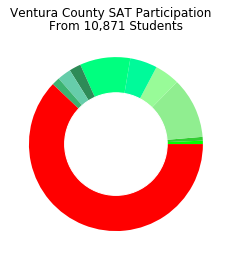

In [113]:
plt.pie(ventura['num_test_takers'], colors = colors1)

my_circle=plt.Circle( (0,0), 0.59, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.title("From 10,871 Students") 
plt.suptitle('Ventura County SAT Participation')

plt.savefig('sat_participation_donut', dpi = 300, bbox_inches='tight')
plt.show()



In [87]:
ventura.head()

,testable_students,num_test_takers,percent_tested,combined_avg
Fillmore,241,68,0.28,1389
Ojai,236,77,0.33,1511
Oxnard,4108,1227,0.3,1414
Simi_Valley,1532,506,0.33,1597
Ventura,1395,551,0.39,1558


In [88]:
ventura.index

Index(['Fillmore', 'Ojai', 'Oxnard', 'Simi_Valley', 'Ventura', 'Conejo_Valley',
       'Oak_Park', 'Moorpark', 'Santa_Paula', 'Totals'],
      dtype='object')

In [89]:
ventura

,testable_students,num_test_takers,percent_tested,combined_avg
Fillmore,241,68,0.28,1389
Ojai,236,77,0.33,1511
Oxnard,4108,1227,0.3,1414
Simi_Valley,1532,506,0.33,1597
Ventura,1395,551,0.39,1558
Conejo_Valley,1869,1019,0.55,1684
Oak_Park,422,236,0.56,1785
Moorpark,627,276,0.44,1609
Santa_Paula,441,162,0.37,1290
Totals,10871,4122,3.55,13837


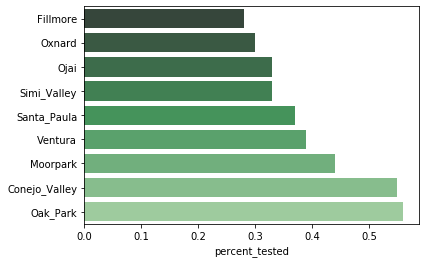

In [90]:
sns.barplot(x = 'percent_tested', y = ventura.index , 
            data = ventura, 
            palette="Greens_d", 
            order=['Fillmore', 'Oxnard', 'Ojai', 'Simi_Valley', "Santa_Paula",
                   "Ventura", "Moorpark", "Conejo_Valley", "Oak_Park",
            ]

)


In [91]:
ventura['percent_tested'].sort_values()

Fillmore         0.28
Oxnard            0.3
Ojai             0.33
Simi_Valley      0.33
Santa_Paula      0.37
Ventura          0.39
Moorpark         0.44
Conejo_Valley    0.55
Oak_Park         0.56
Totals           3.55
Name: percent_tested, dtype: object

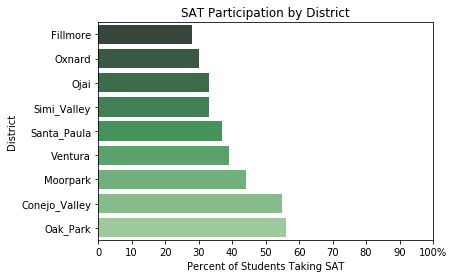

In [114]:

ax = sns.barplot(x = 'percent_tested', y = ventura.index , 
            data = ventura, 
            palette="Greens_d", 
            order=['Fillmore', 'Oxnard', 'Ojai', 'Simi_Valley', "Santa_Paula",
                   "Ventura", "Moorpark", "Conejo_Valley", "Oak_Park"]
)
ax.set(xlabel='Percent of Students Taking SAT', ylabel='District')
ax.set_xticks([0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1.0])
ax.set_xticklabels(['0', '10', '20', '30', '40', '50', '60', '70', '80', '90', '100%'])
ax.set_title('SAT Participation by District')
plt.savefig('sat_participation_barplot', dpi = 300, bbox_inches='tight')
plt.show()

In [0]:

colors2 = ['#00FF00','#32CD32','#90EE90','#98FB98','#00FA9A','#00FF7F','#2E8B57','#66CDAA','#3CB371']

In [0]:
## now lets see how I can put a red line in at 50%


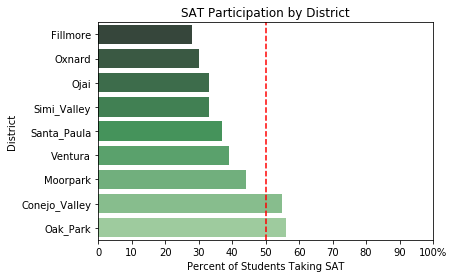

In [119]:

ax = sns.barplot(x = 'percent_tested', y = ventura.index , 
            data = ventura, 
            palette="Greens_d", 
            order=['Fillmore', 'Oxnard', 'Ojai', 'Simi_Valley', "Santa_Paula",
                   "Ventura", "Moorpark", "Conejo_Valley", "Oak_Park"]
)
ax.set(xlabel='Percent of Students Taking SAT', ylabel='District')
ax.set_xticks([0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1.0])
ax.set_xticklabels(['0', '10', '20', '30', '40', '50', '60', '70', '80', '90', '100%'])
ax.axvline(x = .5, ls='--', c='red')
ax.set_title('SAT Participation by District')
plt.savefig('sat_participation_barplot', dpi = 300, bbox_inches='tight')
plt.show()